In [15]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [45]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [46]:
train= pd.read_csv('prac.csv',encoding='ANSI')

In [47]:
prac.head(5)

,일자,석탄
0,2015-01-01,98525
1,2015-01-02,115424
2,2015-01-03,117490
3,2015-01-04,112604
4,2015-01-05,117665


In [48]:
train=prac[(prac['일자']>='2019-01-01')&(prac['일자']<'2019-08-01')]

In [49]:
test=prac[(prac['일자']>='2019-08-01')&(prac['일자']<'2019-08-12')]

In [50]:
train['일자']=train['일자'].astype('str')
train['일자']=pd.to_datetime(train['일자'])
train.index=train['일자']
train.set_index('일자',inplace=True)

<AxesSubplot:xlabel='일자'>

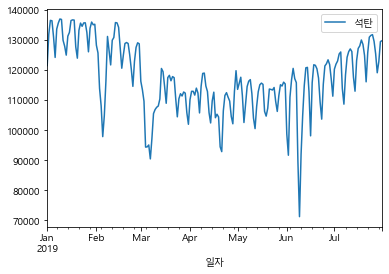

In [51]:
train.plot()

In [52]:
train.isnull().sum()

석탄    0
dtype: int64

In [53]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller

""" 차분 방법 """
train_diff =train - train.shift(1)
print(train)

y = train.dropna()
y1diff = train_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

                석탄
일자                
2019-01-01  121469
2019-01-02  131874
2019-01-03  136484
2019-01-04  136358
2019-01-05  130972
2019-01-06  124165
2019-01-07  133605
2019-01-08  135600
2019-01-09  136948
2019-01-10  136796
2019-01-11  129859
2019-01-12  127919
2019-01-13  124933
2019-01-14  131236
2019-01-15  132484
2019-01-16  136431
2019-01-17  136655
2019-01-18  136582
2019-01-19  127664
2019-01-20  123920
2019-01-21  133199
2019-01-22  135585
2019-01-23  134517
2019-01-24  135639
2019-01-25  135673
2019-01-26  132480
2019-01-27  126035
2019-01-28  133872
2019-01-29  135926
2019-01-30  135024
2019-01-31  135198
2019-02-01  128225
2019-02-02  125667
2019-02-03  113876
2019-02-04  108052
2019-02-05   97836
2019-02-06  104853
2019-02-07  116230
2019-02-08  131142
2019-02-09  126515
2019-02-10  121674
2019-02-11  129894
2019-02-12  130794
2019-02-13  135755
2019-02-14  135668
2019-02-15  134187
2019-02-16  127241
2019-02-17  120576
2019-02-18  124970
2019-02-19  128795
2019-02-20  

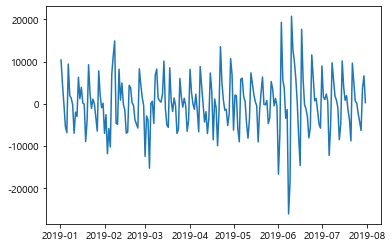

In [54]:
diff_1=train['석탄'].diff().dropna()
plt.plot(diff_1)

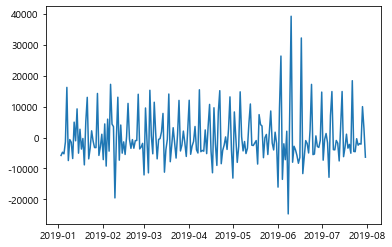

In [38]:
diff_2=diff_1.diff().dropna()
plt.plot(diff_2)

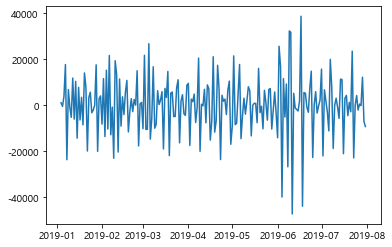

In [39]:
diff_3=diff_2.diff().dropna()
plt.plot(diff_3)

In [55]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [57]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train['석탄'], order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [59]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=0, ma=2)파라미터로 arima모델을 학습
model=ARIMA(train['석탄'], order=(4,1,2))
model_fit=model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.석탄   No. Observations:                  211
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2102.890
Method:                       css-mle   S.D. of innovations           5130.587
Date:                Tue, 19 Oct 2021   AIC                           4219.780
Time:                        17:47:01   BIC                           4243.243
Sample:                    01-02-2019   HQIC                          4229.264
                         - 07-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.석탄     0.7968      0.091      8.722      0.000       0.618       0.976
ar.L2.D.석탄    -1.0904      0.091    -12.016      0.000      -1.268      -0.913
ar.L3.D.석탄     0.3715      0.080      4.665      0.0

<AxesSubplot:xlabel='일자'>

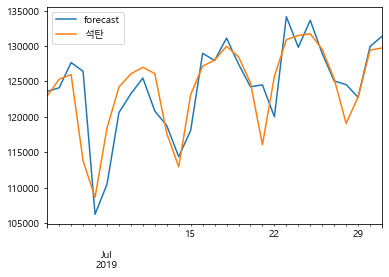

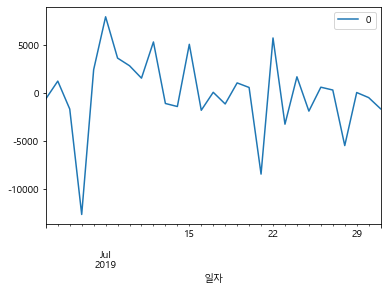

In [101]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [93]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [94]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.석탄.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 628.2895914633227
(0, 0, 1) 610.1091792001937
(0, 0, 2) 611.2342769234829
(0, 0, 3) 613.15828079911
(0, 0, 4) 611.5990598268576
(0, 1, 0) 604.5507497369704
(0, 1, 1) 602.8758041089616
(0, 1, 2) 592.0691400008808
(0, 1, 3) nan
(0, 1, 4) nan
(0, 2, 0) 599.5240373485079
(0, 2, 1) 590.9031674598922
(0, 2, 2) nan
(0, 2, 3) 581.8562297895481
(0, 2, 4) 583.7858379075601
(1, 0, 0) 619.0367040952231
(1, 0, 1) 611.2905850905582
(1, 0, 2) 616.8100068597946
(1, 0, 3) 616.792830745579
(1, 0, 4) 653.2314474013458
(1, 1, 0) 605.4992153448823
(1, 1, 1) 601.7839596537196
(1, 1, 2) 593.7836057718928
(1, 1, 3) 595.6854514861295
(1, 1, 4) 593.451693241512
(1, 2, 0) 601.0550308891819
(2, 0, 0) 611.4252489972922
(2, 0, 1) 612.5791776102127
(2, 0, 2) 614.2142597362147
(2, 1, 0) 600.1307656762717
(2, 1, 1) 590.9994067980628
(2, 1, 2) 588.6119655583747
(2, 2, 0) 595.9685302422197
(2, 2, 2) 582.0306596008589
(3, 0, 0) 613.0266759779857
(3, 0, 1) 633.0877440393099
(3, 0, 2) 608.1350304374904
(3, 1, 0) 

In [102]:
forecast_data=model_fit.forecast(steps=11) #학습데이터 셋으로 부터 10일 뒤를 예측

pred_y=forecast_data[0].tolist()
test_y=test.석탄.values #실제 10일의 미세먼지 데이터

In [103]:
pred_y

[129696.23717869948,
 127784.2463875562,
 122137.16590413112,
 119348.25235065552,
 121016.22978196568,
 123340.44056221626,
 125164.02019569771,
 125424.11931987082,
 122778.43694528122,
 119216.99339003745,
 117417.10955785228]

In [104]:
test_y

array([128717, 127716, 124408, 122445, 129004, 130098, 131304, 131583,
       132284, 127415, 122518], dtype=int64)

In [105]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

5911.410130370109


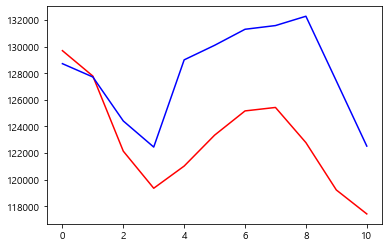

In [106]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')